In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('Donnees_etude_marche.csv')

##ANALYSE BIVARIÉE

## A. Croisements socio-démographiques

In [22]:
from tabulate import tabulate

# Table croisée : Sexe × Connaissance des produits
table_sexe_connaissance = pd.crosstab(df['Sexe'], df['Connaissance_Produits'])

# Affichage élégant de la table
print("\n📊 Sexe vs Connaissance des produits\n")
print(tabulate(table_sexe_connaissance, headers='keys', tablefmt='fancy_grid'))

# Test du Khi² d’indépendance
chi2, p, dof, expected = stats.chi2_contingency(table_sexe_connaissance)

# Résultat bien présenté
print("\n🧪 Résultat du test du Khi² :")
print(f"  - Statistique χ² : {chi2:.2f}")
print(f"  - p-value         : {p:.4f}")
print(f"  - Degrés de liberté : {dof}")


📊 Sexe vs Connaissance des produits

╒════════╤═══════╤═══════╕
│ Sexe   │   Non │   Oui │
╞════════╪═══════╪═══════╡
│ Femme  │    56 │   215 │
├────────┼───────┼───────┤
│ Homme  │    98 │   131 │
╘════════╧═══════╧═══════╛

🧪 Résultat du test du Khi² :
  - Statistique χ² : 27.49
  - p-value         : 0.0000
  - Degrés de liberté : 1



📊 Commune vs Support d'information (Top 5 Communes)

╒════════════════════════════╤════════════════════╤════════════════════╤═════════╤═══════════════════╤═══════╕
│ Commune                    │   Affichage campus │   Bouche-à-oreille │   Email │   Réseaux sociaux │   SMS │
╞════════════════════════════╪════════════════════╪════════════════════╪═════════╪═══════════════════╪═══════╡
│ Dakar-Plateau              │                 22 │                 20 │      15 │                 0 │     0 │
├────────────────────────────┼────────────────────┼────────────────────┼─────────┼───────────────────┼───────┤
│ Gueule Tapée-Fass-Colobane │                 19 │                 12 │      20 │                 0 │     0 │
├────────────────────────────┼────────────────────┼────────────────────┼─────────┼───────────────────┼───────┤
│ Ngor                       │                  0 │                  0 │       0 │                20 │    30 │
├────────────────────────────┼────────────────────┼───────

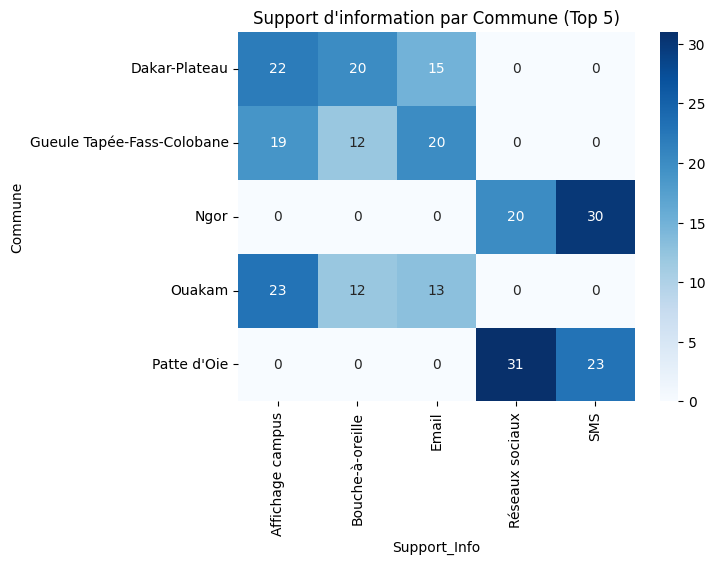

In [24]:
# Commune × Support info

# Extraire les 5 communes les plus représentées
top_communes = df['Commune'].value_counts().index[:5]
df_top_communes = df[df['Commune'].isin(top_communes)]

# Table croisée
table_commune_support = pd.crosstab(df_top_communes['Commune'], df_top_communes['Support_Info'])

# Affichage élégant
print("\n📊 Commune vs Support d'information (Top 5 Communes)\n")
print(tabulate(table_commune_support, headers='keys', tablefmt='fancy_grid'))

# Test du Khi² d’indépendance
chi2, p, dof, expected = stats.chi2_contingency(table_commune_support)

# Résultat formaté
print("\n🧪 Résultat du test du Khi² :")
print(f"  - Statistique χ² : {chi2:.2f}")
print(f"  - p-value         : {p:.4f}")
print(f"  - Degrés de liberté : {dof}")



sns.heatmap(table_commune_support, annot=True, fmt='d', cmap='Blues')
plt.title("Support d'information par Commune (Top 5)")
plt.show()



Corrélation Âge vs WTP:
Corrélation de Pearson: -0.001


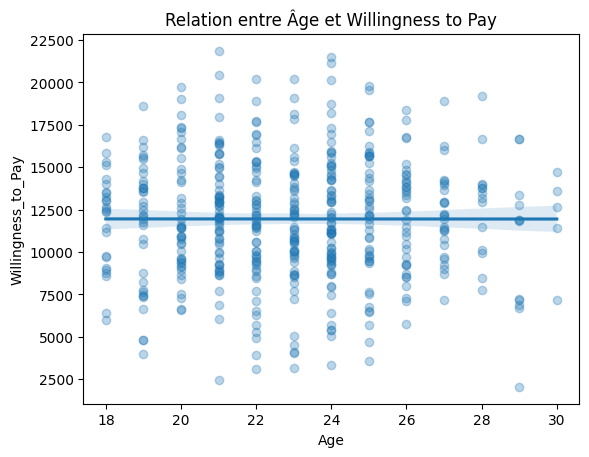

In [25]:
# Âge × WTP
print("\nCorrélation Âge vs WTP:")
corr_age_wtp = df['Age'].corr(df['Willingness_to_Pay'])
print(f"Corrélation de Pearson: {corr_age_wtp:.3f}")

plt.figure()
sns.regplot(x='Age', y='Willingness_to_Pay', data=df, scatter_kws={'alpha':0.3})
plt.title('Relation entre Âge et Willingness to Pay')
plt.show()

##B. Comportements d'achat vs caractéristiques

In [19]:

# Table croisée
table_connaissance_freq = pd.crosstab(df['Connaissance_Produits'], df['Frequence_Achat'])

print("\n📊 Connaissance des produits vs Fréquence d'achat\n")
print(tabulate(table_connaissance_freq, headers='keys', tablefmt='fancy_grid'))

# Test du Khi²
chi2, p, dof, expected = stats.chi2_contingency(table_connaissance_freq)

# Résultat du test formaté
print("\n🧪 Résultat du test du Khi² d'indépendance :")
print(f"  - Statistique χ² : {chi2:.2f}")
print(f"  - p-value         : {p:.4f}")
print(f"  - Degrés de liberté : {dof}")



📊 Connaissance des produits vs Fréquence d'achat

╒═════════════════════════╤══════════╤═══════════╤════════════╤═══════════╤════════════════╕
│ Connaissance_Produits   │   Jamais │   Parfois │   Rarement │   Souvent │   Très souvent │
╞═════════════════════════╪══════════╪═══════════╪════════════╪═══════════╪════════════════╡
│ Non                     │       45 │        56 │         53 │         0 │              0 │
├─────────────────────────┼──────────┼───────────┼────────────┼───────────┼────────────────┤
│ Oui                     │        0 │       116 │          0 │       127 │            103 │
╘═════════════════════════╧══════════╧═══════════╧════════════╧═══════════╧════════════════╛

🧪 Résultat du test du Khi² d'indépendance :
  - Statistique χ² : 322.80
  - p-value         : 0.0000
  - Degrés de liberté : 4



💰 Connaissance des produits vs Dépense moyenne mensuelle

📈 Moyenne (Oui) : 16794.23 FCFA
📉 Moyenne (Non): 11070.94 FCFA

🧪 Test de Student (Welch):
  - t-statistic : 17.77
  - p-value     : 0.0000


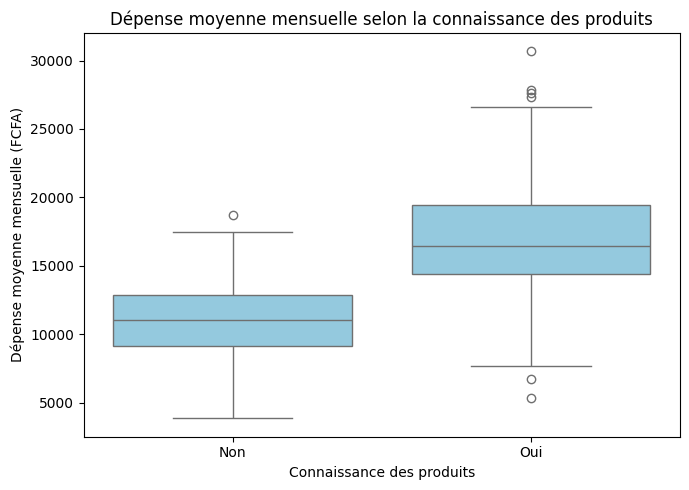

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("\n💰 Connaissance des produits vs Dépense moyenne mensuelle")

# Séparer les groupes
groupe_oui = df[df['Connaissance_Produits'] == 'Oui']['Depense_Moyenne_Mois']
groupe_non = df[df['Connaissance_Produits'] == 'Non']['Depense_Moyenne_Mois']

# Affichage des moyennes
print(f"\n📈 Moyenne (Oui) : {groupe_oui.mean():.2f} FCFA")
print(f"📉 Moyenne (Non): {groupe_non.mean():.2f} FCFA")

# Test de Student (Welch si variances inégales)
print("\n🧪 Test de Student (Welch):")
t_stat, p_val = stats.ttest_ind(groupe_oui, groupe_non, equal_var=False)
print(f"  - t-statistic : {t_stat:.2f}")
print(f"  - p-value     : {p_val:.4f}")

plt.figure(figsize=(7, 5))
sns.boxplot(x='Connaissance_Produits', y='Depense_Moyenne_Mois', data=df, color='skyblue')
plt.title("Dépense moyenne mensuelle selon la connaissance des produits")
plt.xlabel("Connaissance des produits")
plt.ylabel("Dépense moyenne mensuelle (FCFA)")
plt.tight_layout()
plt.show()



## C. Intérêt pour le nouveau produit

In [31]:
  # Intérêt × Sexe
table_interet_sexe = pd.crosstab(df['Interet_Nouveau_Service'], df['Sexe'])

# Affichage élégant de la table
print("\n📊 Intérêt pour le nouveau service vs Sexe\n")
print(tabulate(table_interet_sexe, headers='keys', tablefmt='fancy_grid'))

# Test du Khi² d’indépendance
chi2, p, dof, expected = stats.chi2_contingency(table_interet_sexe)

# Affichage du résultat du test
print("\n🧪 Résultat du test du Khi² :")
print(f"  - Statistique χ² : {chi2:.2f}")
print(f"  - p-value         : {p:.4f}")
print(f"  - Degrés de liberté : {dof}")


📊 Intérêt pour le nouveau service vs Sexe

╒═══════════════════════════╤═════════╤═════════╕
│ Interet_Nouveau_Service   │   Femme │   Homme │
╞═══════════════════════════╪═════════╪═════════╡
│ Non                       │      80 │      68 │
├───────────────────────────┼─────────┼─────────┤
│ Oui                       │     191 │     161 │
╘═══════════════════════════╧═════════╧═════════╛

🧪 Résultat du test du Khi² :
  - Statistique χ² : 0.00
  - p-value         : 1.0000
  - Degrés de liberté : 1



📊 Intérêt vs Satisfaction globale

📈 Moyenne (Oui) : 2.96
📉 Moyenne (Non): 3.51

🧪 Test de Student (Welch) :
  - t-statistic : -4.65
  - p-value     : 0.0000


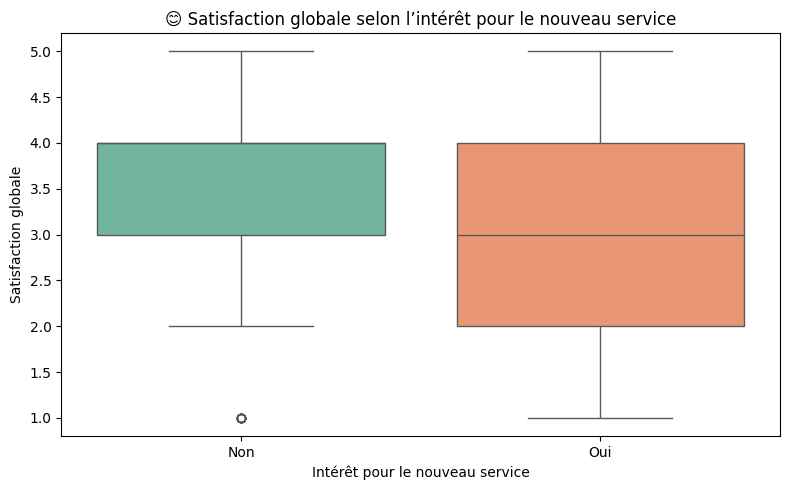

In [36]:
 # Intérêt × Satisfaction

print("\n📊 Intérêt vs Satisfaction globale")

# Séparer les deux groupes
groupe_interet_oui = df[df['Interet_Nouveau_Service'] == 'Oui']['Satisfaction_Globale']
groupe_interet_non = df[df['Interet_Nouveau_Service'] == 'Non']['Satisfaction_Globale']

# Affichage des moyennes
print(f"\n📈 Moyenne (Oui) : {groupe_interet_oui.mean():.2f}")
print(f"📉 Moyenne (Non): {groupe_interet_non.mean():.2f}")

# Test de Student (Welch)
print("\n🧪 Test de Student (Welch) :")
t_stat, p_val = stats.ttest_ind(groupe_interet_oui, groupe_interet_non, equal_var=False)
print(f"  - t-statistic : {t_stat:.2f}")
print(f"  - p-value     : {p_val:.4f}")

plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Interet_Nouveau_Service',
    y='Satisfaction_Globale',
    data=df,
    hue='Interet_Nouveau_Service',      # nouveau
    palette="Set2",
    legend=False                        # pour éviter d’avoir une légende en double
)
plt.title('😊 Satisfaction globale selon l’intérêt pour le nouveau service')
plt.xlabel("Intérêt pour le nouveau service")
plt.ylabel("Satisfaction globale")
plt.tight_layout()
plt.show()


In [37]:

print("\n🧩 4. Incitations et Willingness To Pay (WTP)")

# Séparer les groupes selon l’intérêt
groupe_wtp_oui = df[df['Interet_Nouveau_Service'] == 'Oui']['Willingness_to_Pay']
groupe_wtp_non = df[df['Interet_Nouveau_Service'] == 'Non']['Willingness_to_Pay']

# Affichage des moyennes
print("\n💰 WTP vs Intérêt pour le nouveau service")
print(f"📈 Moyenne WTP (Oui)  : {groupe_wtp_oui.mean():.2f}")
print(f"📉 Moyenne WTP (Non) : {groupe_wtp_non.mean():.2f}")

# Test de Student (Welch)
print("\n🧪 Test de Student (Welch) :")
t_stat, p_val = stats.ttest_ind(groupe_wtp_oui, groupe_wtp_non, equal_var=False)
print(f"  - t-statistic : {t_stat:.2f}")
print(f"  - p-value     : {p_val:.4f}")



🧩 4. Incitations et Willingness To Pay (WTP)

💰 WTP vs Intérêt pour le nouveau service
📈 Moyenne WTP (Oui)  : 12934.29
📉 Moyenne WTP (Non) : 9596.34

🧪 Test de Student (Welch) :
  - t-statistic : 11.04
  - p-value     : 0.0000



📈 Corrélation : Importance du prix vs Willingness To Pay (WTP)
🔗 Corrélation de Spearman : 0.006


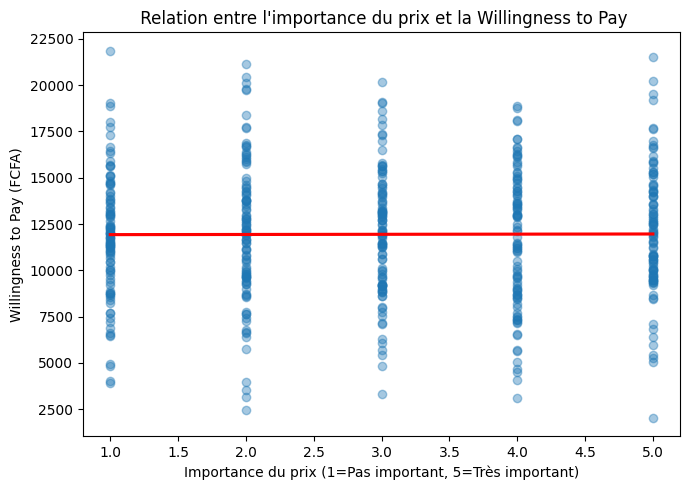

In [39]:

print("\n📈 Corrélation : Importance du prix vs Willingness To Pay (WTP)")

# Corrélation de Spearman
corr_prix_wtp = df['Importance_Prix'].corr(df['Willingness_to_Pay'], method='spearman')
print(f"🔗 Corrélation de Spearman : {corr_prix_wtp:.3f}")

plt.figure(figsize=(7, 5))
sns.regplot(
    x='Importance_Prix',
    y='Willingness_to_Pay',
    data=df,
    scatter_kws={'alpha': 0.4},
    line_kws={"color": "red"},
    ci=None
)
plt.title(" Relation entre l'importance du prix et la Willingness to Pay")
plt.xlabel("Importance du prix (1=Pas important, 5=Très important)")
plt.ylabel("Willingness to Pay (FCFA)")
plt.tight_layout()
plt.show()


In [47]:
import statsmodels.api as sm

# Corrélation Satisfaction vs WTP
print("\n📊 Corrélation Satisfaction vs WTP:")
corr_satisfaction_wtp = df['Satisfaction_Globale'].corr(df['Willingness_to_Pay'])
table_corr = [["Corrélation de Pearson", f"{corr_satisfaction_wtp:.3f}"]]
print(tabulate(table_corr, headers=["Mesure", "Valeur"], tablefmt="github"))

# Régression linéaire
print("\n📈 Régression linéaire: WTP ~ Satisfaction")

X = sm.add_constant(df['Satisfaction_Globale'])
y = df['Willingness_to_Pay']
model = sm.OLS(y, X).fit()

# Extraire les résultats importants
summary_table = []
for var in model.params.index:
    summary_table.append([
        var,
        f"{model.params[var]:.3f}",
        f"{model.bse[var]:.3f}",
        f"{model.pvalues[var]:.3f}"
    ])

print(tabulate(summary_table, headers=["Variable", "Coefficient", "Erreur Std.", "p-value"], tablefmt="github"))

# Affichage des statistiques clés
metrics_table = [
    ["R-squared", f"{model.rsquared:.3f}"],
    ["R-squared ajusté", f"{model.rsquared_adj:.3f}"],
    ["F-statistic", f"{model.fvalue:.3f}"],
    ["Prob (F-statistic)", f"{model.f_pvalue:.3f}"],
]

print("\nStatistiques du modèle:")
print(tabulate(metrics_table, headers=["Statistique", "Valeur"], tablefmt="github"))



📊 Corrélation Satisfaction vs WTP:
| Mesure                 |   Valeur |
|------------------------|----------|
| Corrélation de Pearson |        1 |

📈 Régression linéaire: WTP ~ Satisfaction
| Variable             |   Coefficient |   Erreur Std. |   p-value |
|----------------------|---------------|---------------|-----------|
| const                |            -5 |             0 |         0 |
| Satisfaction_Globale |             5 |             0 |         0 |

Statistiques du modèle:
| Statistique        |      Valeur |
|--------------------|-------------|
| R-squared          | 1           |
| R-squared ajusté   | 1           |
| F-statistic        | 2.97106e+31 |
| Prob (F-statistic) | 0           |
